In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(123)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


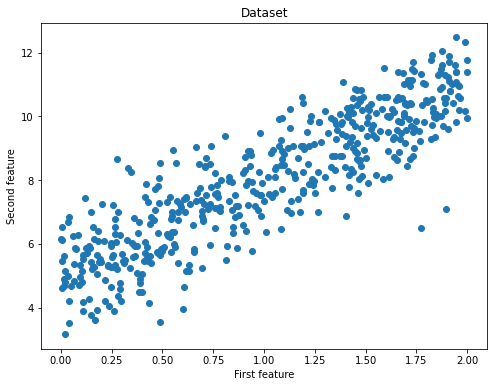

In [21]:
X = 2 * np.random.rand(500,1) #返回一个或一组服从“0~1”均匀分布的随机样本值
y = 5 + 3 * X + np.random.randn(500, 1)
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y) #生成数据集
print(f'Shape X_train: {X_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (375, 1)
Shape X_test: (125, 1)
Shape y_train: (375, 1)
Shape y_test: (125, 1)


In [45]:
class LinearRegression:
    def __init__(self):
        pass
    def train_gradient_descent(self, X, y, learning_rate = 0.01, n_iters = 100):
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []
        for i in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias
            # Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)

            if i % 100 == 0:
                print(f"Cost at iteration {i}: {cost}")

            # Step 3: Compute the gradients
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y)) 
            
            # Step 4: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs
    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Cost at iteration 0: 68.5578342126993
Cost at iteration 100: 2.0745944195081347
Cost at iteration 200: 1.2445793245855417
Cost at iteration 300: 1.1641365689126755
Cost at iteration 400: 1.1112913765827588
Cost at iteration 500: 1.0728455182894654


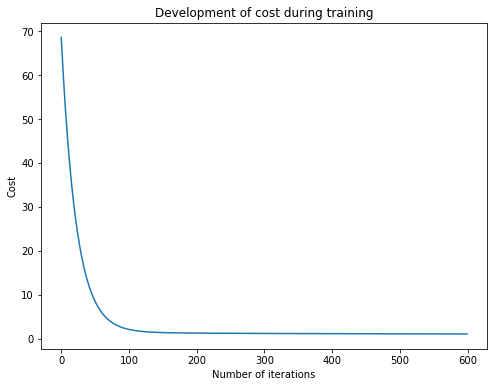

In [46]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=600)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [59]:
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test)}")

Error on training set: 1.0448
Error on test set: 1.0


In [60]:
# To compute the parameters using the normal equation, we add a bias value of 1 to each input example
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]
#X_b_train = X_train
#X_b_test = X_test
reg_normal = LinearRegression()
w_trained = reg_normal.train_normal_equation(X_b_train, y_train)

In [61]:
y_p_train = reg_normal.predict(X_b_train)
y_p_test = reg_normal.predict(X_b_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test, 4)}")

Error on training set: 0.9696
Error on test set: 0.8708


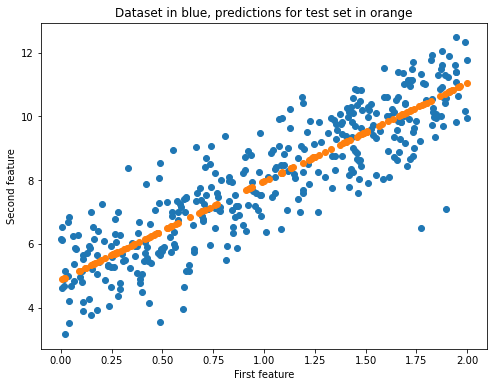

In [62]:
fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

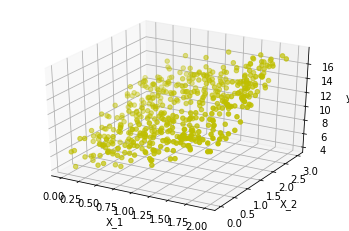

In [103]:
X_1 = 2 * np.random.rand(500,1) #返回一个或一组服从“0~1”均匀分布的随机样本值
X_2 = 3 * np.random.rand(500,1)
y = 5 + 3 * X_1 + 2 * X_2 + np.random.randn(500, 1)
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(X_1, X_2, y, c='y')  # 绘制数据点
ax.set_zlabel('y')  
ax.set_ylabel('X_2')
ax.set_xlabel('X_1')
plt.show()

In [104]:
X = np.c_[X_1,X_2]
X_train, X_test, y_train, y_test = train_test_split(X,y) #生成数据集
print(f'Shape X_train: {X_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (375, 2)
Shape X_test: (125, 2)
Shape y_train: (375, 1)
Shape y_test: (125, 1)


In [105]:
class LinearRegression:
    def __init__(self):
        pass
    def train_gradient_descent(self, X, y, learning_rate = 0.01, n_iters = 100):
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []
        for i in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias
            # Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)

            if i % 1000 == 0:
                print(f"Cost at iteration {i}: {cost}")

            # Step 3: Compute the gradients
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y)) 
            
            # Step 4: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs
    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Cost at iteration 0: 129.5330600912258
Cost at iteration 1000: 1.2468334234399165
Cost at iteration 2000: 1.1731327803030032
Cost at iteration 3000: 1.1657256930899058
Cost at iteration 4000: 1.164978909169562
Cost at iteration 5000: 1.1649036180416068


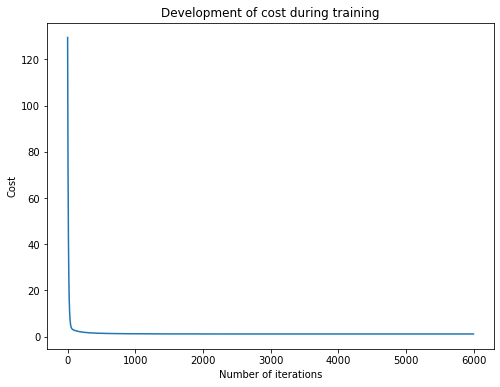

In [106]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=6000)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(6000), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [107]:
y_p_train = reg_normal.predict(X_train)
y_p_test = reg_normal.predict(X_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test, 4)}")

Error on training set: 5.758
Error on test set: 5.1162


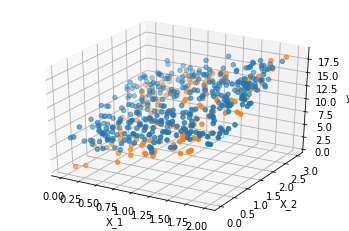

In [108]:
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
X_1_train = X_train[:,0]
X_2_train = X_train[:,1]
X_1_test = X_test[:,0]
X_2_test = X_test[:,1]
ax.scatter(X_1_train, X_2_train, y_train)  # 绘制数据点
ax.scatter(X_1_test, X_2_test, y_p_test)
ax.set_zlabel('y')  
ax.set_ylabel('X_2')
ax.set_xlabel('X_1')
plt.show()



In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(123)

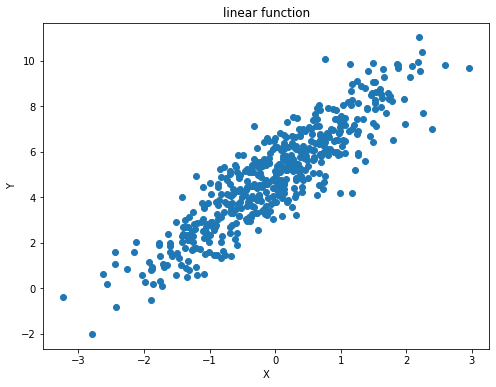

In [127]:
X = np.random.randn(500,1)
y = 5 + 2 * X + np.random.randn(500,1)
fig = plt.figure(figsize = (8,6))
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("linear function")
plt.show()

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 1)
(125, 1)
(375, 1)
(125, 1)


In [153]:
class Linear_Regression:
    
    
    def __inint__(self):
        pass
    
    
    def gradient_desent(self, X_train, y_train, lr = 0.01, iteration = 1000):
        n_data, n_feature = X_train.shape
        self.weights = np.ones(shape = (n_feature,1))
        print(self.weights)
        self.bias = 0
        cose = []
        for i in range(iteration):
            
            y_predict = np.dot(X_train, self.weights) + self.bias
            
            
            cost = 1/n_data * sum(((y_predict - y_train) ** 2))
            cose.append(cost)
            if i % 100 == 0:
                print(f"Cost at iteration {i}: {cost}")
            
            dj_dw = 2/n_data * np.dot(X_train.T,(y_predict - y_train))
            dj_db = 2/n_data * sum((y_predict - y_train))
            
            self.weights = self.weights - dj_dw * lr
            self.bias = self.bias - dj_db * lr
            
        return self.weights, self.bias, cost
    
            
            
        
    
        
        
        
        
        
        

In [154]:
regressior = Linear_Regression()
weights, bias, cost = regressior.gradient_desent(X_train, y_train, lr = 0.01, iteration = 1000)

[[1.]]
Cost at iteration 0: [26.57562809]
Cost at iteration 100: [1.43639997]
Cost at iteration 200: [1.00428383]
Cost at iteration 300: [0.99682848]
Cost at iteration 400: [0.99669936]
Cost at iteration 500: [0.99669712]
Cost at iteration 600: [0.99669708]
Cost at iteration 700: [0.99669708]
Cost at iteration 800: [0.99669708]
Cost at iteration 900: [0.99669708]
